### Importing Libraries

In [1]:
import numpy as mp
import pandas as pd
import seaborn as sb
import matplotlib.ticker as tick
import matplotlib.pyplot as plt
%matplotlib inline

### Reading CSV File

In [2]:
churn = pd.read_csv("Churn.csv")

In [3]:
churn

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### Data Analysis

In [4]:
churn.shape

(10000, 14)

In [5]:
churn.columns.values

array(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'], dtype=object)

In [6]:
churn.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
churn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          0 non-null      float64
 3   CreditScore      10000 non-null  int64  
 4   Geography        0 non-null      float64
 5   Gender           0 non-null      float64
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(5), int64(9)
memory usage: 1.1 MB


In [11]:
churn.Surname = pd.to_numeric(churn.Surname, errors='coerce')
churn.Geography = pd.to_numeric(churn.Surname, errors='coerce')
churn.Gender = pd.to_numeric(churn.Surname, errors='coerce')
churn.isnull().sum()

RowNumber              0
CustomerId             0
Surname            10000
CreditScore            0
Geography          10000
Gender             10000
Age                    0
Tenure                 0
Balance                0
NumOfProducts          0
HasCrCard              0
IsActiveMember         0
EstimatedSalary        0
Exited                 0
dtype: int64

In [12]:
# Dropping the null values
churn.dropna()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [13]:
churn = churn.drop(columns= ['Surname', 'Geography', 'Gender'])
churn

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,516,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,709,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,772,42,3,75075.31,2,1,0,92888.52,1


<Axes: >

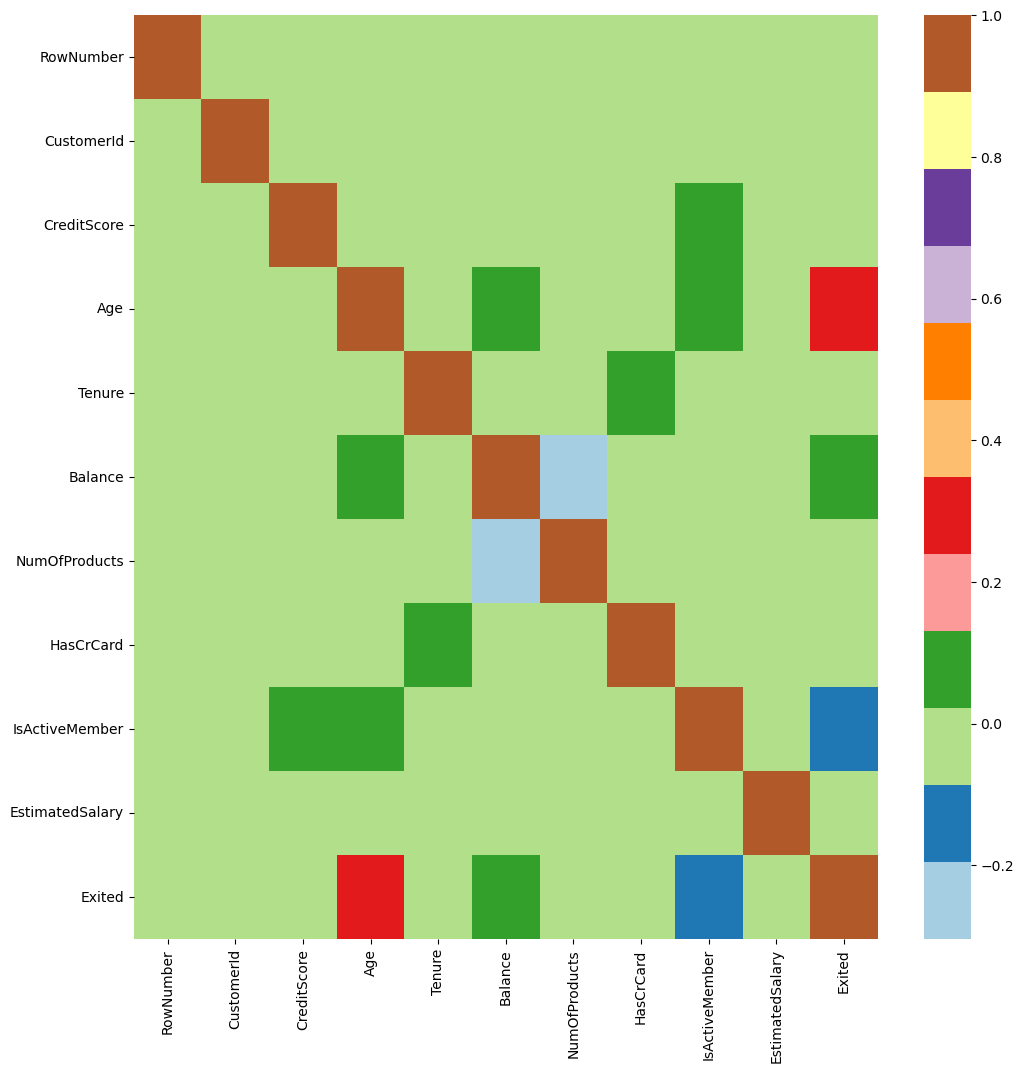

In [14]:
plt.figure(figsize=(12,12))
sb.heatmap(churn.corr(), cmap="Paired")

In [15]:
pip install --upgrade imbalanced-learn scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


### Model Building

In [17]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

In [18]:
churn = pd.read_csv('Churn.csv')

In [19]:
churn

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [20]:
churn = churn.drop(columns= ['Surname', 'Geography', 'Gender'])
churn

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,516,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,709,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,772,42,3,75075.31,2,1,0,92888.52,1


### Splitting Train and Test Data

In [21]:
x = churn.drop('Exited', axis=1)
x

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,619,42,2,0.00,1,1,1,101348.88
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57
3,4,15701354,699,39,1,0.00,2,0,0,93826.63
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,39,5,0.00,2,1,0,96270.64
9996,9997,15569892,516,35,10,57369.61,1,1,1,101699.77
9997,9998,15584532,709,36,7,0.00,1,0,1,42085.58
9998,9999,15682355,772,42,3,75075.31,2,1,0,92888.52


In [22]:
y = churn['Exited']
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state= 21)

### Decision Tree Classifier

In [24]:
dt = DecisionTreeClassifier()

In [25]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [26]:
y_pred = dt.predict(x_test)

In [27]:
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [28]:
dt.score(x_test, y_pred)

1.0

In [29]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      2393
           1       0.47      0.51      0.49       607

    accuracy                           0.78      3000
   macro avg       0.67      0.68      0.68      3000
weighted avg       0.79      0.78      0.79      3000



In [30]:
print(confusion_matrix(y_test, y_pred))

[[2041  352]
 [ 297  310]]


### Smote

In [35]:
smote_enn = SMOTEENN()
x_resampled, y_resampled = smote_enn.fit_resample(x, y)

In [36]:
xr_train, xr_test, yr_train, yr_test = train_test_split(x_resampled, y_resampled, test_size = 0.2)

In [39]:
dt_smote = DecisionTreeClassifier(criterion='gini', random_state=100, max_depth=6, min_samples_leaf=8)

In [40]:
dt_smote.fit(xr_train, yr_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [41]:
y_pred_smote = dt_smote.predict(xr_test)

In [42]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      2393
           1       0.47      0.51      0.49       607

    accuracy                           0.78      3000
   macro avg       0.67      0.68      0.68      3000
weighted avg       0.79      0.78      0.79      3000



In [44]:
print(confusion_matrix(yr_test, y_pred_smote))

[[436 210]
 [ 81 916]]


### Random Forest Classifier

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
rf_smote = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=100, max_depth=6, min_samples_leaf=8)
rf_smote.fit(x_train, y_train)
y_pred_rf = rf_smote.predict(x_test)

In [53]:
print(classification_report(y_test, y_pred_rf, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      2393
           1       0.81      0.39      0.53       607

    accuracy                           0.86      3000
   macro avg       0.84      0.68      0.72      3000
weighted avg       0.85      0.86      0.84      3000



In [55]:
print(confusion_matrix(y_test, y_pred_rf))

[[2338   55]
 [ 370  237]]


In [57]:
smote_enn = SMOTEENN()
x_resampled_rf, y_resampled_rf = smote_enn.fit_resample(x, y)

In [58]:
xr_train, xr_test, yr_train, yr_test = train_test_split(x_resampled_rf, y_resampled_rf, test_size = 0.2)

In [59]:
rf_smote_model = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=100, max_depth=6, min_samples_leaf=8)

In [60]:
rf_smote_model.fit(xr_train, yr_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [61]:
y_pred_smote_rf = rf_smote_model.predict(xr_test)

In [62]:
print(classification_report(y_test, y_pred_rf, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      2393
           1       0.81      0.39      0.53       607

    accuracy                           0.86      3000
   macro avg       0.84      0.68      0.72      3000
weighted avg       0.85      0.86      0.84      3000



In [64]:
print(confusion_matrix(yr_test, y_pred_smote_rf))

[[444 204]
 [ 87 929]]
